In [3]:
import pandas as pd
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

## No need to run

In [5]:
tle_path='../TLE/all_by_id_latest/'
starttime=datetime.strptime("2022-4-1 0:0:0","%Y-%m-%d %H:%M:%S")
endtime=datetime.strptime("2022-7-20 0:0:0","%Y-%m-%d %H:%M:%S")

In [ ]:
g = os.walk(tle_path)  
df_list=[]
for path,dir_list,file_list in g:  
    for file in tqdm(file_list):
        temp=pd.read_csv(path+file)
        temp['EPOCH']=temp['EPOCH'].astype('datetime64[ns]')
        temp=temp[(temp['EPOCH']>=starttime)&(temp['EPOCH']<=endtime)]
        if temp.shape[0]>0:
            df_list.append(temp)
tle=pd.concat(df_list)
del df_list
data=pd.DataFrame(columns=tle.columns)
for satid in tqdm(tle['NORAD_CAT_ID'].unique()):
    temp_df=tle[tle['NORAD_CAT_ID']==satid]
    temp_df=temp_df.sort_values(by='EPOCH')
    data=data.append(temp_df.loc[temp_df.index[-1]])
data['height']=data.apply(lambda x:x['SEMIMAJOR_AXIS']-6378.135,axis=1)
data.to_csv('latest_tle.csv')

### Start from this line

In [4]:
data=pd.read_csv('./data/latest_tle.csv')

In [6]:
all=[]
debris=[]
starlinks=[]
rocket=[]
payloads=[]
unknown=[]

for h in range(200,1301,1):
    temp_df=data[((data['height']>=h)&(data['height']<h+1))]
    all.append(temp_df.shape[0])
    debris.append(temp_df[temp_df['OBJECT_TYPE']=='DEBRIS'].shape[0])
    starlinks.append(temp_df[temp_df['OBJECT_NAME'].str.contains('STARLINK')].shape[0])
    rocket.append(temp_df[temp_df['OBJECT_TYPE']=='ROCKET BODY'].shape[0])
    payloads.append(temp_df[temp_df['OBJECT_TYPE']=='PAYLOAD'].shape[0])
    unknown.append(temp_df[temp_df['OBJECT_TYPE']=='UNKNOWN'].shape[0])
    
    

## Figure 4: Distribution of space objects by altitudes.

/var/folders/8c/lhywgg_15jz7c8cs4r3cn1wr0000gn/T/ipykernel_78587/3663206327.py:15: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,1000)


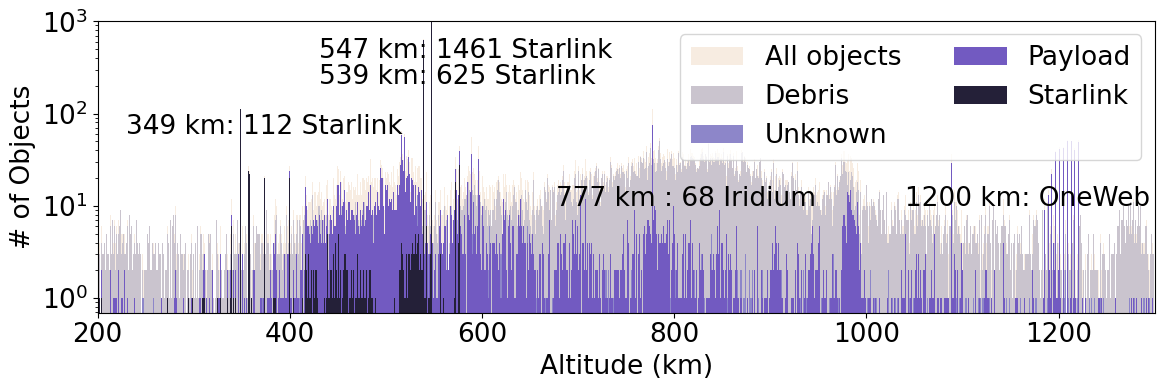

In [7]:
# c=['#0d1b2a', '#1B263B', '#415A77', '#778DA9', '#E0E1DD'] #深蓝色
# c=["#03045e","#0077b6","#00b4d8","#90e0ef","#caf0f8"] #蓝色
# c=["#2f3e46","#354f52","#52796f","#84a98c","#cad2c5"] #墨绿色
c=["#242038","#725ac1","#8d86c9","#cac4ce","#f7ece1"]
## debris和rocketbody都算debris,unknown单独画出
plt.figure(figsize=(12,4))
plt.bar(range(200,1301,1),all,label='All objects',width=1,color=c[4])
# plt.bar(range(200,1301,1),debris,label='Debris',width=1,color=c[3])
# plt.bar(range(200,1301,1),rocket,label='Rocket body',width=1,color=c[2])
plt.bar(range(200,1301,1),[debris[i]+rocket[i] for i in range(len(debris))],label='Debris',width=1,color=c[3])
plt.bar(range(200,1301,1),unknown,label='Unknown',width=1,color=c[2])
plt.bar(range(200,1301,1),payloads,label='Payload',width=1,color=c[1])
plt.bar(range(200,1301,1),starlinks,label='Starlink',width=1,color=c[0])
plt.yscale("log")
plt.ylim(0,1000)
plt.xlim(200,1300)
plt.legend(loc='upper right',fontsize=19,ncol=2)
plt.xlabel('Altitude (km)',fontsize=19)
plt.ylabel('# of Objects',fontsize=19)
plt.xticks(fontsize=19)
plt.yticks(fontsize=19)
plt.text(430,400,'547 km: 1461 Starlink',fontsize=19) 
plt.text(430,210,'539 km: 625 Starlink',fontsize=19)
plt.text(230,60,'349 km: 112 Starlink',fontsize=19)
plt.text(1040,10,'1200 km: OneWeb',fontsize=19)
plt.text(677,10,'777 km : 68 Iridium',fontsize=19)
plt.tight_layout()
plt.savefig('figure4.pdf')
